In [161]:
# !pip install geopy
import matplotlib.pyplot as plt
import pandas as pd
from geopy.geocoders import Nominatim
from tqdm import tqdm
from geopy.distance import geodesic

geolocator = Nominatim(user_agent="kaggle_learn", timeout=7)
pd.set_option('display.max_rows', 10)
tqdm.pandas()

## 1. Obtención de los datos

### a. Cargar los datos a estudiar.

In [162]:
df_starbucks = pd.read_csv('starbucks.csv')
df_starbucks = df_starbucks.head(20)
df_starbucks

,Store Number,Store Name,Address,City
0,10429-100710,Palmdale & Hwy 395,14136 US Hwy 395 Adelanto CA,Adelanto
1,635-352,Kanan & Thousand Oaks,5827 Kanan Road Agoura CA,Agoura
2,74510-27669,Vons-Agoura Hills #2001,5671 Kanan Rd. Agoura Hills CA,Agoura Hills
3,29839-255026,Target Anaheim T-0677,8148 E SANTA ANA CANYON ROAD AHAHEIM CA,AHAHEIM
4,23463-230284,Safeway - Alameda 3281,2600 5th Street Alameda CA,Alameda
...,...,...,...,...
15,6794-41839,Fremont Ave & Mission Rd,"1131 S Fremont Ave, A Alhambra CA",Alhambra
16,11220-104633,"Atlantic & Valley, Alhambra",1410 South Atlantic Blvd. Alhambra CA,Alhambra
17,47671-258708,Albertsons - Alhambras 6543,2400 W. Commonwealth Alhambra CA,Alhambra
18,9385-96258,"Valley & Almansor, Alhambra",810 E VALLEY BLVD ALHAMBRA CA,ALHAMBRA


In [163]:
df_starbucks.columns

Index(['Store Number', 'Store Name', 'Address', 'City'], dtype='object')

## b. Hacer un resumen con la explicación de las variables del juego de datos.
Store Number: Contiene el numero identificador de cada tienda.


Store Name: Cada tienda de Starbucks tiene un nombre único que la identifica. Este nombre puede ser una combinación de factores como la ubicación, el área comercial, el nombre del centro comercial.

Adress: La direccion en donde se encuentra la tienda

City: La ciudad en donde se encuentra la tienda

### c. Imprimir los primeros datos.

In [164]:
df_starbucks.head(n=10)

,Store Number,Store Name,Address,City
0,10429-100710,Palmdale & Hwy 395,14136 US Hwy 395 Adelanto CA,Adelanto
1,635-352,Kanan & Thousand Oaks,5827 Kanan Road Agoura CA,Agoura
2,74510-27669,Vons-Agoura Hills #2001,5671 Kanan Rd. Agoura Hills CA,Agoura Hills
3,29839-255026,Target Anaheim T-0677,8148 E SANTA ANA CANYON ROAD AHAHEIM CA,AHAHEIM
4,23463-230284,Safeway - Alameda 3281,2600 5th Street Alameda CA,Alameda
5,6479-62999,Park & Central Alameda,1364 Park Street Alameda CA,Alameda
6,5535-728,Webster & Atlantic - Alameda,720 Atlantic Avenue Alameda CA,Alameda
7,74877-100291,Safeway - Alameda #2708,2227 South Shore Center Alameda CA,Alameda
8,11161-103516,Tilden & Blanding,"2671 Blanding Avene, D Alameda CA",Alameda
9,19859-196187,Target Alameda T-2829,2700 Fifth St Alameda CA,Alameda


# 2 Operaciones con tablas

### a. Utilizando loc obtener el nombre de la tienda que se encuentra en la dirección ‘1444 Shattuck Place Berkeley CA

In [165]:
df_starbucks[df_starbucks.Address=='1444 Shattuck Place Berkeley CA']

,Store Number,Store Name,Address,City


### b. En una linea de código, obtener todos los registros que tengan a Berkeley como ciudad.

In [166]:
df_starbucks[df_starbucks.City == 'Berkeley']

,Store Number,Store Name,Address,City


In [167]:
print(df_starbucks[~df_starbucks['Address'].str.endswith('CA')])

def remove_end(cadena, elemento):
    # Esta función remueve el final de una cadena de caracteres, a partir de una palabra o "elemento" dado
    if elemento != -1:  # Verificar si se encontró la última ocurrencia
        return cadena[:elemento]
    return cadena

def remove_city_ca(row):
    cadena = row['Address'] # Tomo el contenido de la columna 'Address' para la fila dada
    ultima_ocurrencia = cadena.rfind(row['City']) # Busco en 'Address' la 'City' desde atrás hacia adelante y me quedo con la primera ocurrencia
    return remove_end(cadena, ultima_ocurrencia)

def remove_coma(row):
    cadena = row['Address_limpia'] # Tomo el contenido de la columna 'Address_limpia' para la fila dada
    ultima_ocurrencia = cadena.find(',') # Busco en 'Address_limpia' una ',' desde atrás hacia adelante y me quedo con la primera ocurrencia
    return remove_end(cadena, ultima_ocurrencia)
    

df_starbucks_geolocator = df_starbucks.copy() # creo una copia del Dataframe que estoy utilizando 
df_starbucks_geolocator['Address_limpia'] = df_starbucks_geolocator.apply(remove_city_ca, axis=1)
df_starbucks_geolocator['Address_limpia'] = df_starbucks_geolocator.apply(remove_coma, axis=1)
df_starbucks_geolocator

Empty DataFrame
Columns: [Store Number, Store Name, Address, City]
Index: []


,Store Number,Store Name,Address,City,Address_limpia
0,10429-100710,Palmdale & Hwy 395,14136 US Hwy 395 Adelanto CA,Adelanto,14136 US Hwy 395
1,635-352,Kanan & Thousand Oaks,5827 Kanan Road Agoura CA,Agoura,5827 Kanan Road
2,74510-27669,Vons-Agoura Hills #2001,5671 Kanan Rd. Agoura Hills CA,Agoura Hills,5671 Kanan Rd.
3,29839-255026,Target Anaheim T-0677,8148 E SANTA ANA CANYON ROAD AHAHEIM CA,AHAHEIM,8148 E SANTA ANA CANYON ROAD
4,23463-230284,Safeway - Alameda 3281,2600 5th Street Alameda CA,Alameda,2600 5th Street
...,...,...,...,...,...
15,6794-41839,Fremont Ave & Mission Rd,"1131 S Fremont Ave, A Alhambra CA",Alhambra,1131 S Fremont Ave
16,11220-104633,"Atlantic & Valley, Alhambra",1410 South Atlantic Blvd. Alhambra CA,Alhambra,1410 South Atlantic Blvd.
17,47671-258708,Albertsons - Alhambras 6543,2400 W. Commonwealth Alhambra CA,Alhambra,2400 W. Commonwealth
18,9385-96258,"Valley & Almansor, Alhambra",810 E VALLEY BLVD ALHAMBRA CA,ALHAMBRA,810 E VALLEY BLVD


### c. Agregar los datos de latitud y longitud en nuevas columnas usando la información de la columna Address mediante la librería geopy.geocoders
### d. Realizar lo mismo para todos los registros, si da un error capturar el mismo y guardar la dirección en una lista.

In [168]:
def get_lat_lon(row):
    location = None
    try:
        location = geolocator.geocode({"street": row['Address_limpia'], 'city':row['City'], "state": "CA", 'county':'US'}, exactly_one=True)
    except Exception as e:
        print(e)
    return location

df_starbucks_geolocator['Location'] = df_starbucks_geolocator.progress_apply(lambda x: get_lat_lon(x), axis=1)

100%|██████████| 20/20 [00:13<00:00,  1.47it/s]


### e. Para los casos en que falló el código, observar las direcciones e intentar modificarlas para que se pueda agregar latitud y longitud de las mismas.

In [176]:
location_faltantes = df_starbucks_geolocator[df_starbucks_geolocator['Location'].isna()]
location_faltantes

,Store Number,Store Name,Address,City,Address_limpia,Location,distancia_a_legoland
3,29839-255026,Target Anaheim T-0677,8148 E SANTA ANA CANYON ROAD AHAHEIM CA,AHAHEIM,8148 E SANTA ANA CANYON ROAD,None,NaN
8,11161-103516,Tilden & Blanding,"2671 Blanding Avene, D Alameda CA",Alameda,2671 Blanding Avene,None,NaN
10,5335-904,Alameda Towne Center,2210-J South Shore Drive Alameda CA,Alameda,2210-J South Shore Drive,None,NaN


In [177]:
location_faltantes[location_faltantes['Address_limpia'].str.contains('#')]
def remove_hastag(row):
    cadena = row['Address_limpia'] # Tomo el contenido de la columna 'Address_limpia' para la fila dada
    ultima_ocurrencia = cadena.find('#') # Busco en 'Address_limpia' una ',' desde atrás hacia adelante y me quedo con la primera ocurrencia
    return remove_end(cadena, ultima_ocurrencia)
location_faltantes['Address_limpia'] = location_faltantes.apply(remove_hastag, axis=1)

/var/folders/3l/g6ng2bts1j78r5313d79x6fh0000gn/T/ipykernel_42137/2750781706.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_faltantes['Address_limpia'] = location_faltantes.apply(remove_hastag, axis=1)


In [178]:
location_faltantes[location_faltantes['City'].str.contains('AHAHEIM')]

,Store Number,Store Name,Address,City,Address_limpia,Location,distancia_a_legoland
3,29839-255026,Target Anaheim T-0677,8148 E SANTA ANA CANYON ROAD AHAHEIM CA,AHAHEIM,8148 E SANTA ANA CANYON ROAD,None,NaN


In [179]:
location_faltantes.groupby(['City']).size()

City
AHAHEIM    1
Alameda    2
dtype: int64

In [180]:
geolocator.geocode({"street": "8148 Santa Ana Canyon Road", 'city':"AnAHEIM", "state": "CA", 'county':'US'}, exactly_one=True)

Location(8148, Santa Ana Canyon Road, Anaheim, Orange County, California, 92808, United States, (33.86867584931131, -117.74910993832657, 0.0))

### f. Remover de la columna ‘Address’ el texto que contiene el nombre de la ciudad + ‘CA’ utilizando el valor de la columna ‘City’ (tener en cuenta que los nombres de Ciudades pueden haberse escrito de distinta forma ej. Yucaipa y YUCAIPA).

In [181]:
df_starbucks['City'] = df_starbucks['City'].str.lower()
# df_starbucks.groupby('City')[['Address']].count()
def find_city_ca(row):
    cadena = row['Address'].lower() # Tomo el contenido de la columna 'Address' para la fila dada
    ultima_ocurrencia = cadena.rfind(row['City']) # Busco en 'Address' la 'City' desde atrás hacia adelante y me quedo con la primera ocurrencia
    return ultima_ocurrencia != -1

df_starbucks['City'] = df_starbucks['City'].replace('ahaheim', 'anaheim')

# df_starbucks['Ciudad_coincide'] = df_starbucks.apply(find_city_ca, axis=1)
# ciudades = ['Adelanto','Agoura Hills','Alameda','Albany','Alhambra','Aliso Viejo','Alturas','Amador City','American Canyon','Anaheim','Anderson','Angels Camp','Antioch','Apple Valley','Arcadia','Arcata','Arroyo Grande','Artesia','Arvin','Atascadero','Atherton','Atwater','Auburn','Avalon','Avenal','Azusa','Bakersfield','Baldwin Park','Banning','Barstow','Beaumont','Bell','Bell Gardens','Bellflower','Belmont','Belvedere','Benicia','Berkeley','Beverly Hills','Big Bear Lake','Biggs','Bishop','Blue Lake','Blythe','Bradbury','Brawley','Brea','Brentwood','Brisbane','Buellton','Buena Park','Burbank','Burlingame','Calabasas','Calexico','California City','Calimesa','Calipatria','Calistoga','Camarillo','Campbell','Canyon Lake','Capitola','Carlsbad','Carmel-by-the-Sea','Carpinteria','Carson','Cathedral City','Ceres','Cerritos','Chico','Chino','Chino Hills','Chowchilla','Chula Vista','Citrus Heights','Claremont','Clayton','Clearlake','Cloverdale','Clovis','Coachella','Coalinga','Colfax','Colma','Colton','Colusa','Commerce','Compton','Concord','Corcoran','Corning','Corona','Coronado','Corte Madera','Costa Mesa','Cotati','Covina','Crescent City','Cudahy','Culver City','Cupertino','Cypress','Daly City','Dana Point','Danville','Davis','Del Mar','Del Rey Oaks','Delano','Desert Hot Springs','Diamond Bar','Dinuba','Dixon','Dorris','Dos Palos','Downey','Duarte','Dublin','Dunsmuir','East Palo Alto','Eastvale','El Cajon','El Centro','El Cerrito','El Monte','El Segundo','Elk Grove','Emeryville','Encinitas','Escalon','Escondido','Etna','Eureka','Exeter','Fairfax','Fairfield','Farmersville','Ferndale','Fillmore','Firebaugh','Folsom','Fontana','Fort Bragg','Fort Jones','Fortuna','Foster City','Fountain Valley','Fowler','Fremont','Fresno','Fullerton','Galt','Garden Grove','Gardena','Gilroy','Glendale','Glendora','Goleta','Gonzales','Grand Terrace','Grass Valley','Greenfield','Gridley','Grover Beach','Guadalupe','Gustine','Half Moon Bay','Hanford','Hawaiian Gardens','Hawthorne','Hayward','Healdsburg','Hemet','Hercules','Hermosa Beach','Hesperia','Hidden Hills','Highland','Hillsborough','Hollister','Holtville','Hughson','Huntington Beach','Huntington Park','Huron','Imperial','Imperial Beach','Indian Wells','Indio','City of Industry','Inglewood','Ione','Irvine','Irwindale','Isleton','Jackson','Jurupa Valley','Kerman','King City','Kingsburg','La Cañada Flintridge','La Habra','La Habra Heights','La Mesa','La Mirada','La Palma','La Puente','La Quinta','La Verne','Lafayette','Laguna Beach','Laguna Hills','Laguna Niguel','Laguna Woods','Lake Elsinore','Lake Forest','Lakeport','Lakewood','Lancaster','Larkspur','Lathrop','Lawndale','Lemon Grove','Lemoore','Lincoln','Lindsay','Live Oak','Livermore','Livingston','Lodi','Loma Linda','Lomita','Lompoc','Long Beach','Loomis','Los Alamitos','Los Altos','Los Altos Hills','Los Angeles','Los Banos','Los Gatos','Loyalton','Lynwood','Madera','Malibu','Mammoth Lakes','Manhattan Beach','Manteca','Maricopa','Marina','Martinez','Marysville','Maywood','McFarland','Mendota','Menifee','Menlo Park','Merced','Mill Valley','Millbrae','Milpitas','Mission Viejo','Modesto','Monrovia','Montague','Montclair','Monte Sereno','Montebello','Monterey','Monterey Park','Moorpark','Moraga','Moreno Valley','Morgan Hill','Morro Bay','Mount Shasta','Mountain View','Murrieta','Napa','National City','Needles','Nevada City','Newark','Newman','Newport Beach','Norco','Norwalk','Novato','Oakdale','Oakland','Oakley','Oceanside','Ojai','Ontario','Orange','Orange Cove','Orinda','Orland','Oroville','Oxnard','Pacific Grove','Pacifica','Palm Desert','Palm Springs','Palmdale','Palo Alto','Palos Verdes Estates','Paradise','Paramount','Parlier','Pasadena','Paso Robles','Patterson','Perris','Petaluma','Pico Rivera','Piedmont','Pinole','Pismo Beach','Pittsburg','Placentia','Placerville','Pleasant Hill','Pleasanton','Plymouth','Point Arena','Pomona','Port Hueneme','Porterville','Portola','Portola Valley','Poway','Rancho Cordova','Rancho Cucamonga','Rancho Mirage','Rancho Palos Verdes','Rancho Santa Margarita','Red Bluff','Redding','Redlands','Redondo Beach','Redwood City','Reedley','Rialto','Richmond','Ridgecrest','Rio Dell','Rio Vista','Ripon','Riverbank','Riverside','Rocklin','Rohnert Park','Rolling Hills','Rolling Hills Estates','Rosemead','Roseville','Ross','Sacramento','St. Helena','Salinas','San Anselmo','San Bernardino','San Bruno','San Carlos','San Clemente','San Diego','San Dimas','San Fernando','San Francisco','San Gabriel','San Jacinto','San Joaquin','San Jose','San Juan Bautista','San Juan Capistrano','San Leandro','San Luis Obispo','San Marcos','San Marino','San Mateo','San Pablo','San Rafael','San Ramon','Sand City','Sanger','Santa Ana','Santa Barbara','Santa Clara','Santa Clarita','Santa Cruz','Santa Fe Springs','Santa Maria','Santa Monica','Santa Paula','Santa Rosa','Santee','Saratoga','Sausalito','Scotts Valley','Seal Beach','Seaside','Sebastopol','Selma','Shafter','Shasta Lake','Sierra Madre','Signal Hill','Simi Valley','Solana Beach','Soledad','Solvang','Sonoma','Sonora','South El Monte','South Gate','South Lake Tahoe','South Pasadena','South San Francisco','Stanton','Stockton','Suisun City','Sunnyvale','Susanville','Sutter Creek','Taft','Tehachapi','Tehama','Temecula','Temple City','Thousand Oaks','Tiburon','Torrance','Tracy','Trinidad','Truckee','Tulare','Tulelake','Turlock','Tustin','Twentynine Palms','Ukiah','Union City','Upland','Vacaville','Vallejo','Ventura','Vernon','Victorville','Villa Park','Visalia','Vista','Walnut','Walnut Creek','Wasco','Waterford','Watsonville','Weed','West Covina','West Hollywood','West Sacramento','Westlake Village','Westminster','Westmorland','Wheatland','Whittier','Wildomar','Williams','Willits','Willows','Windsor','Winters','Woodlake','Woodland','Woodside','Yorba Linda','Yountville','Yreka','Yuba City','Yucaipa','Yucca Valley']
# df_starbucks[~df_starbucks['City'].str.title().isin(ciudades)]

### g Crear una columna nueva en la que se asigne la distancia a las tiendas respecto a la dirección de Legoland, California. Ordenar los registros de menor a mayor distancia.

In [187]:
from geopy.distance import geodesic
# berkeley = (37.8716,-122.2727)
# los_angeles = (34.0522,-118.2437)
# distancia = geodesic(berkeley, los_angeles).kilometers

legoland = (33.126194, -117.310623)
df_starbucks_geolocator['distancia_a_legoland'] = pd.Series()

for i in range(len(df_starbucks_geolocator)):
    ubicacion = df_starbucks_geolocator.loc[i, 'Location'][-1]  # Obtén la última ubicación de la lista
    distancia = geodesic(legoland, ubicacion).kilometers
    df_starbucks_geolocator.loc[i, 'distancia_a_legoland'] = distancia

df_starbucks_geolocator

TypeError: 'NoneType' object is not subscriptable

In [185]:
df_starbucks_geolocator

,Store Number,Store Name,Address,City,Address_limpia,Location,distancia_a_legoland
0,10429-100710,Palmdale & Hwy 395,14136 US Hwy 395 Adelanto CA,Adelanto,14136 US Hwy 395,"(14136, Blue Star Memorial Highway, Adelanto, ...",153.4136263866376 km
1,635-352,Kanan & Thousand Oaks,5827 Kanan Road Agoura CA,Agoura,5827 Kanan Road,"(Starbucks, 5827, Kanan Road, Agoura Hills, Ca...",176.17202846668408 km
2,74510-27669,Vons-Agoura Hills #2001,5671 Kanan Rd. Agoura Hills CA,Agoura Hills,5671 Kanan Rd.,"(Vons, 5671, Kanan Road, Agoura Hills, Califor...",176.19095597040902 km
3,29839-255026,Target Anaheim T-0677,8148 E SANTA ANA CANYON ROAD AHAHEIM CA,AHAHEIM,8148 E SANTA ANA CANYON ROAD,None,NaN
4,23463-230284,Safeway - Alameda 3281,2600 5th Street Alameda CA,Alameda,2600 5th Street,"(Safeway, 2600, 5th Street, Jack London Square...",NaN
...,...,...,...,...,...,...,...
15,6794-41839,Fremont Ave & Mission Rd,"1131 S Fremont Ave, A Alhambra CA",Alhambra,1131 S Fremont Ave,"(1131, South Fremont Avenue, Alhambra, Califor...",NaN
16,11220-104633,"Atlantic & Valley, Alhambra",1410 South Atlantic Blvd. Alhambra CA,Alhambra,1410 South Atlantic Blvd.,"(1410, South Atlantic Boulevard, Alhambra, Cal...",NaN
17,47671-258708,Albertsons - Alhambras 6543,2400 W. Commonwealth Alhambra CA,Alhambra,2400 W. Commonwealth,"(Albertsons, 2400, West Commonwealth Avenue, A...",NaN
18,9385-96258,"Valley & Almansor, Alhambra",810 E VALLEY BLVD ALHAMBRA CA,ALHAMBRA,810 E VALLEY BLVD,"(810, East Valley Boulevard, Alhambra, Califor...",NaN


### h Crear un índice a partir del nombre de la tienda.

In [11]:
df_starbucks = df_starbucks.set_index('Store Name')
df_starbucks

,Store Number,Address,City
Store Name,,,
Palmdale & Hwy 395,10429-100710,14136 US Hwy 395 Adelanto CA,adelanto
Kanan & Thousand Oaks,635-352,5827 Kanan Road Agoura CA,agoura
Vons-Agoura Hills #2001,74510-27669,5671 Kanan Rd. Agoura Hills CA,agoura hills
Target Anaheim T-0677,29839-255026,8148 E SANTA ANA CANYON ROAD AHAHEIM CA,anaheim
Safeway - Alameda 3281,23463-230284,2600 5th Street Alameda CA,alameda
...,...,...,...
Hwy 20 & Tharp - Yuba City,14071-108147,"1615 Colusa Hwy, Ste 100 Yuba City CA",yuba city
"Yucaipa & Hampton, Yucaipa",9974-98559,"31364 Yucaipa Blvd., A Yucaipa CA",yucaipa
Vons - Yucaipa #1796,79654-108478,33644 YUCAIPA BLVD YUCAIPA CA,yucaipa


In [14]:
df_starbucks.loc["Palmdale & Hwy 395"]

Store Number                    10429-100710
Address         14136 US Hwy 395 Adelanto CA
City                                adelanto
Name: Palmdale & Hwy 395, dtype: object

### I. Agrupar tiendas por ciudad y mostrar los primeros 5 registros.

In [10]:
city_counts = df_starbucks['City'].value_counts()

city_counts_sorted = city_counts.sort_values(ascending=False)

city_counts.head(5)

City
san diego        138
los angeles      128
san francisco     90
san jose          85
sacramento        66
Name: count, dtype: int64

In [11]:
engrupado = df_starbucks.groupby('City')

for ciudad, grupo_ciuda in engrupado:
    print(f"tiendas en la ciudad {ciudad}: ")
    print(grupo_ciuda.head(5),"\n")

tiendas en la ciudad adelanto: 
   Store Number          Store Name                       Address      City
0  10429-100710  Palmdale & Hwy 395  14136 US Hwy 395 Adelanto CA  adelanto 

tiendas en la ciudad agoura: 
  Store Number             Store Name                    Address    City
1      635-352  Kanan & Thousand Oaks  5827 Kanan Road Agoura CA  agoura 

tiendas en la ciudad agoura hills: 
  Store Number               Store Name                         Address  \
2  74510-27669  Vons-Agoura Hills #2001  5671 Kanan Rd. Agoura Hills CA   

           City  
2  agoura hills   

tiendas en la ciudad alameda: 
   Store Number                    Store Name  \
4  23463-230284        Safeway - Alameda 3281   
5    6479-62999        Park & Central Alameda   
6      5535-728  Webster & Atlantic - Alameda   
7  74877-100291       Safeway - Alameda #2708   
8  11161-103516             Tilden & Blanding   

                              Address     City  
4          2600 5th Street Alameda C

# 3. Manejo de series de tiempo
### a. Cargar archivos csv en dos dataframes


In [102]:
df_inumet2023 = pd.read_csv('inumet_temperatura-del-aire-2023.csv')
df_inumet2024 = pd.read_csv('inumet_temperatura-del-aire-2024.csv')

### b. Unir ambos dataframes en una sola tabla.

In [103]:
concatenated_df = pd.concat([df_inumet2023, df_inumet2024])
concatenated_df.head(10)

,fecha,estacion_idStr,TempAire
0,2023-01-01T00:00:00.000Z,CARRASCO,20.6
1,2023-01-01T00:00:00.000Z,aeropuertomelillag3,20.0
2,2023-01-01T01:00:00.000Z,CARRASCO,20.5
3,2023-01-01T01:00:00.000Z,aeropuertomelillag3,20.0
4,2023-01-01T02:00:00.000Z,CARRASCO,20.3
5,2023-01-01T02:00:00.000Z,aeropuertomelillag3,19.7
6,2023-01-01T03:00:00.000Z,CARRASCO,20.0
7,2023-01-01T03:00:00.000Z,aeropuertomelillag3,19.0
8,2023-01-01T04:00:00.000Z,CARRASCO,19.2
9,2023-01-01T04:00:00.000Z,aeropuertomelillag3,18.1


### c. Graficar el comportamiento de la temperatura en función del tiempo.|

Hay una linea que quedo con error que es la linea 3215 pero para nosotros se llega a entender que la temperatura es 22.2
"2024-03-07T23:00:00.000Z","aeropuertomelillag3","22.22024-03-08T00:00:00.000Z"

In [104]:
concatenated_df[concatenated_df.fecha=="2024-03-07T23:00:00.000Z"]

,fecha,estacion_idStr,TempAire
3214,2024-03-07T23:00:00.000Z,CARRASCO,23
3215,2024-03-07T23:00:00.000Z,aeropuertomelillag3,22.22024-03-08T00:00:00.000Z


In [105]:
concatenated_df.loc[3215,'TempAire']=22.2

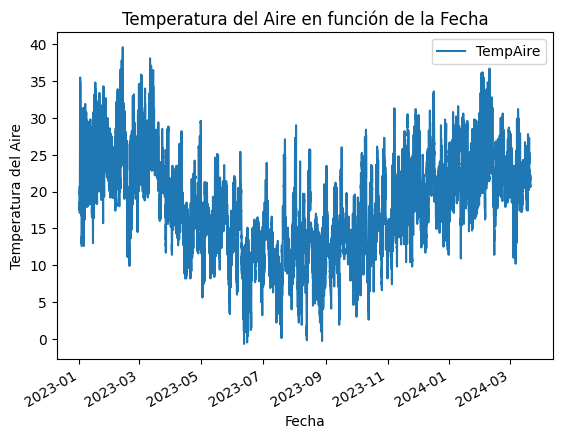

In [106]:

concatenated_df['fecha'] = pd.to_datetime(concatenated_df['fecha'])
concatenated_df['TempAire'] = pd.to_numeric(concatenated_df['TempAire'], errors='coerce')



concatenated_df.plot(x='fecha', y='TempAire', kind='line')

plt.xlabel('Fecha')
plt.ylabel('Temperatura del Aire')
plt.title(f'Temperatura del Aire en función de la Fecha')

# Mostrar la gráfica
plt.show()


### d. Crear un filtro para poder ver mejor las tendencias.

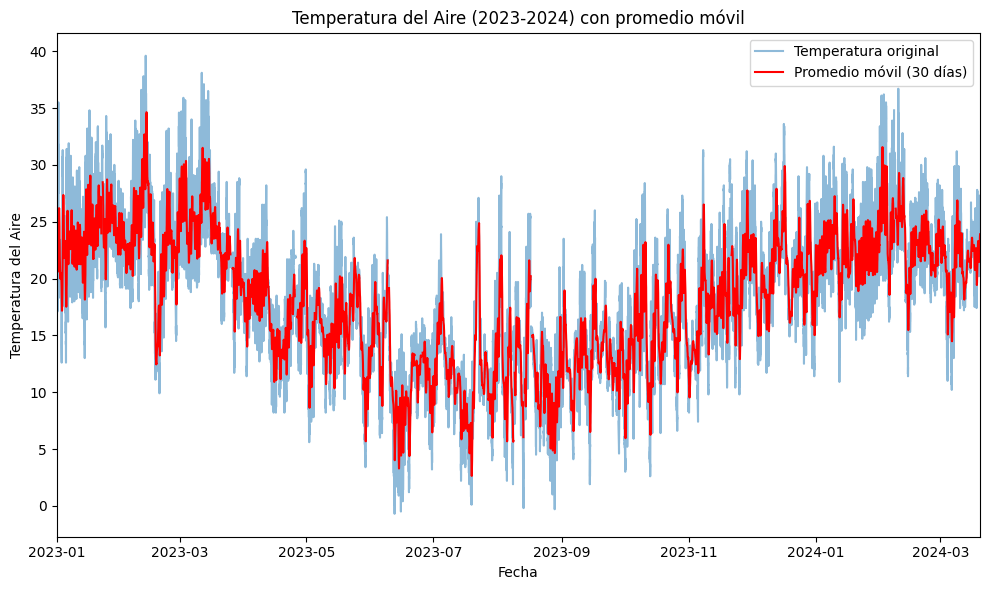

In [107]:
rolling_mean = concatenated_df['TempAire'].rolling(window=30).mean()
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(concatenated_df['fecha'], concatenated_df['TempAire'], label='Temperatura original', alpha=0.5)
ax.plot(concatenated_df['fecha'], rolling_mean, label='Promedio móvil (30 días)', color='red')
start_date = pd.to_datetime('2023-01-01')
end_date = pd.to_datetime('2024-03-20')
ax.set_xlim(start_date, end_date)
ax.legend()
ax.set_xlabel('Fecha')
ax.set_ylabel('Temperatura del Aire')
ax.set_title('Temperatura del Aire (2023-2024) con promedio móvil')
plt.tight_layout()
plt.show()


### e. Graficar la temperatura para distintos períodos de tiempo. Buscando tendencias, cambios, valores anómalos, etc.

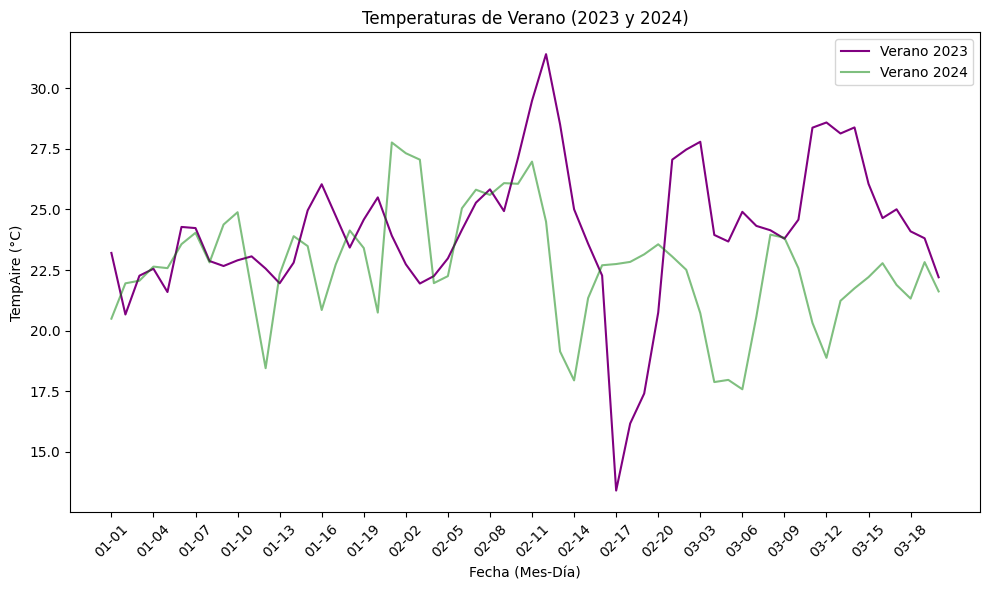

In [108]:
concatenated_df['fecha'] = pd.to_datetime(concatenated_df['fecha'])
start_date = '01-01'
end_date = '03-20'
summer_2023 = concatenated_df[(concatenated_df['fecha'].dt.month >= 1) &
                               (concatenated_df['fecha'].dt.day >= 1) &
                               (concatenated_df['fecha'].dt.month <= 3) &
                               (concatenated_df['fecha'].dt.day <= 20) &
                               (concatenated_df['fecha'].dt.year == 2023)]
                               
summer_2024 = concatenated_df[(concatenated_df['fecha'].dt.month >= 1) &
                               (concatenated_df['fecha'].dt.day >= 1) &
                               (concatenated_df['fecha'].dt.month <= 3) &
                               (concatenated_df['fecha'].dt.day <= 20) &
                               (concatenated_df['fecha'].dt.year == 2024)]
summer_2023 = summer_2023.groupby(summer_2023['fecha'].dt.date)['TempAire'].mean().reset_index()
summer_2024 = summer_2024.groupby(summer_2024['fecha'].dt.date)['TempAire'].mean().reset_index()
summer_2023['fecha'] = pd.to_datetime(summer_2023['fecha'])
summer_2024['fecha'] = pd.to_datetime(summer_2024['fecha'])
summer_2023['fecha'] = pd.to_datetime(summer_2023['fecha'])
summer_2024['fecha'] = pd.to_datetime(summer_2024['fecha'])
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(summer_2023['fecha'].dt.strftime('%m-%d'), summer_2023['TempAire'], color='purple', label='Verano 2023', alpha=1)
ax.plot(summer_2024['fecha'].dt.strftime('%m-%d'), summer_2024['TempAire'], color='green', label='Verano 2024',alpha=0.5)
ax.legend()
ax.set_title('Temperaturas de Verano (2023 y 2024)')
ax.set_xlabel('Fecha (Mes-Día)')
ax.set_ylabel('TempAire (°C)')
ax.set_xticks(ax.get_xticks()[::3])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Comparando ambos años, se puede ver en la grafica, como en 2023 hubo un dia de mucho calor y un dia de frio, mientras que en 2024 se mantuvo mas estable a lo largo del verano

### f.Para los datos del último año crear filas con hora = el punto medio entre dos observaciones.

###### ADVERTENCIA: NO CORRER MAS DE UNA VEZ YA QUE SE MULTIPLICAN LA CANTIDAD DE TUPLAS

In [109]:

df_inumet2024['fecha'] = pd.to_datetime(df_inumet2024['fecha'], format='%Y-%m-%dT%H:%M:%S.%fZ')


nuevas_filas = []
for i in range(0, len(df_inumet2024) - 2, 2):
    fila_actual = df_inumet2024.iloc[i]
    siguiente_fila = df_inumet2024.iloc[i + 2]
    diferencia = siguiente_fila['fecha'] - fila_actual['fecha']
    
    mitad_diferencia = diferencia / 2
     

    fecha_media = fila_actual['fecha'] + mitad_diferencia
    
    d1 = {
        "fecha": fecha_media,
        "TempAire": None,
        "estacion_idStr": None
    }
    nuevas_filas.append(d1)


nuevas_filas_df = pd.DataFrame(nuevas_filas, columns=['fecha', 'TempAire', 'estacion_idStr'])

df_inumet2024 = pd.concat([nuevas_filas_df, df_inumet2024], ignore_index=True)

df_inumet2024 = df_inumet2024.sort_values(by='fecha')

print(df_inumet2024)


                   fecha TempAire       estacion_idStr
1919 2024-01-01 00:00:00     21.9             CARRASCO
1920 2024-01-01 00:00:00     20.2  aeropuertomelillag3
0    2024-01-01 00:30:00     None                 None
1921 2024-01-01 01:00:00     21.3             CARRASCO
1922 2024-01-01 01:00:00     19.9  aeropuertomelillag3
...                  ...      ...                  ...
5755 2024-03-20 22:00:00     20.9  aeropuertomelillag3
5754 2024-03-20 22:00:00     21.2             CARRASCO
1918 2024-03-20 22:30:00     None                 None
5756 2024-03-20 23:00:00     21.2             CARRASCO
5757 2024-03-20 23:00:00     20.8  aeropuertomelillag3

[5758 rows x 3 columns]


###  g. Estimar la temperatura en esos puntos e ingresarla en la tabla.

In [118]:

df_inumet2024['fecha'] = pd.to_datetime(df_inumet2024['fecha'])
df_inumet2024['TempAire'] = pd.to_numeric(df_inumet2024['TempAire'], errors='coerce')
df_inumet2024.set_index('fecha', inplace=True)
df_inumet2024['TempAire'] = df_inumet2024['TempAire'].interpolate('time')
df_inumet2024.reset_index(inplace=True)
print(df_inumet2024.head(10))


                fecha  TempAire       estacion_idStr
0 2024-01-01 00:00:00     21.90             CARRASCO
1 2024-01-01 00:00:00     20.20  aeropuertomelillag3
2 2024-01-01 00:30:00     20.75                 None
3 2024-01-01 01:00:00     21.30             CARRASCO
4 2024-01-01 01:00:00     19.90  aeropuertomelillag3
5 2024-01-01 01:30:00     19.80                 None
6 2024-01-01 02:00:00     19.70             CARRASCO
7 2024-01-01 02:00:00     19.10  aeropuertomelillag3
8 2024-01-01 02:30:00     19.05                 None
9 2024-01-01 03:00:00     19.00             CARRASCO
